TASK 1

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

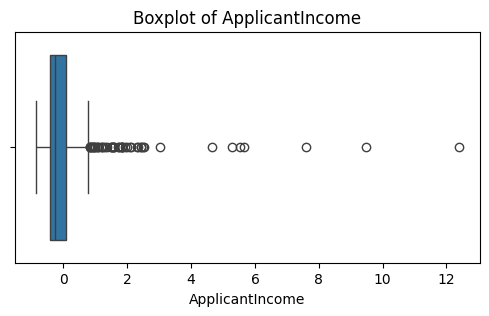

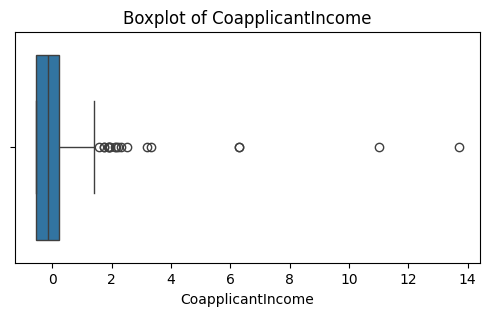

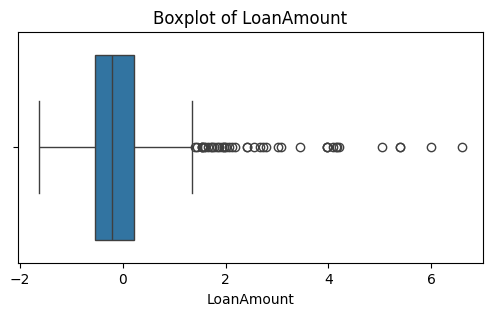

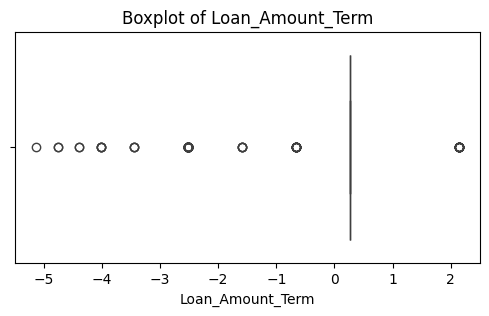

In [1]:
#1
import pandas as pd

df=pd.read_csv("/content/Loan_Prediction_Dataset.csv")

# Basic info
print(df.head())
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())

#2
from sklearn.impute import SimpleImputer

# Numerical columns: handle using mean or median
mean_imputer = SimpleImputer(strategy='mean')
df['LoanAmount'] = mean_imputer.fit_transform(df[['LoanAmount']])

median_imputer = SimpleImputer(strategy='median')
df['Loan_Amount_Term'] = median_imputer.fit_transform(df[['Loan_Amount_Term']])

# Binary numerical column: impute using mode (most frequent)
mode_imputer = SimpleImputer(strategy='most_frequent')
df['Credit_History'] = mode_imputer.fit_transform(df[['Credit_History']])

# Categorical columns: handle using mode
cat_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed']
for col in cat_cols:
    df[col] = mode_imputer.fit_transform(df[[col]]).ravel()  # .ravel() flattens the array


# Check if missing values are resolved
print("Missing values after imputation:\n", df.isnull().sum())

#3
from sklearn.preprocessing import LabelEncoder

# Label encode binary categorical columns
le = LabelEncoder()
binary_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Status']

for col in binary_cols:
    df[col] = le.fit_transform(df[col])

# One-hot encode multi-category columns
df = pd.get_dummies(df, columns=['Dependents', 'Property_Area'], drop_first=True)

# Show the encoded dataframe
print(df.head())

#4
from sklearn.preprocessing import StandardScaler

# Define numerical columns
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Initialize scaler
scaler = StandardScaler()

# Fit and transform the numerical columns
df[num_cols] = scaler.fit_transform(df[num_cols])

# Display the scaled features
print(df[num_cols].head())

#5
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Create boxplots
for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


TASK 2

Summary statistics:
            Gender     Married   Education  Self_Employed  ApplicantIncome  \
count  614.000000  614.000000  614.000000     614.000000     6.140000e+02   
mean     0.817590    0.653094    0.218241       0.133550    -4.339634e-18   
std      0.386497    0.476373    0.413389       0.340446     1.000815e+00   
min      0.000000    0.000000    0.000000       0.000000    -8.606493e-01   
25%      1.000000    0.000000    0.000000       0.000000    -4.138159e-01   
50%      1.000000    1.000000    0.000000       0.000000    -2.606393e-01   
75%      1.000000    1.000000    0.000000       0.000000     6.414426e-02   
max      1.000000    1.000000    1.000000       1.000000     1.238462e+01   

       CoapplicantIncome    LoanAmount  Loan_Amount_Term  Credit_History  \
count       6.140000e+02  6.140000e+02      6.140000e+02      614.000000   
mean        4.050325e-17  5.786179e-18      5.930833e-17        0.855049   
std         1.000815e+00  1.000815e+00      1.000815e+00 

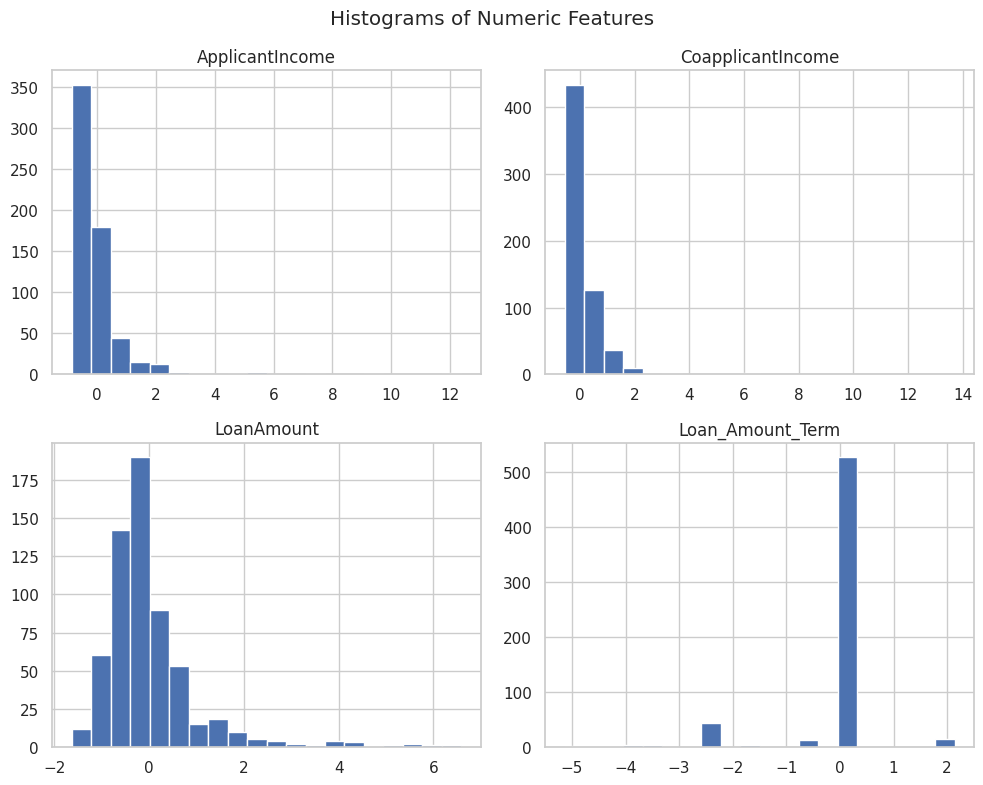

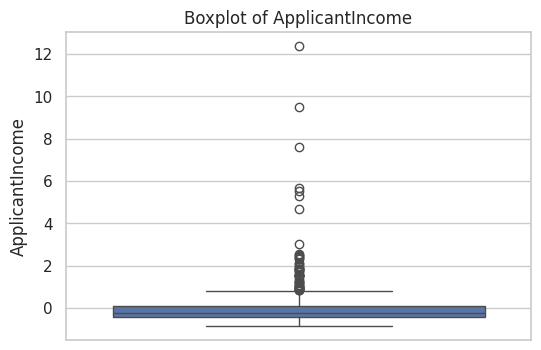

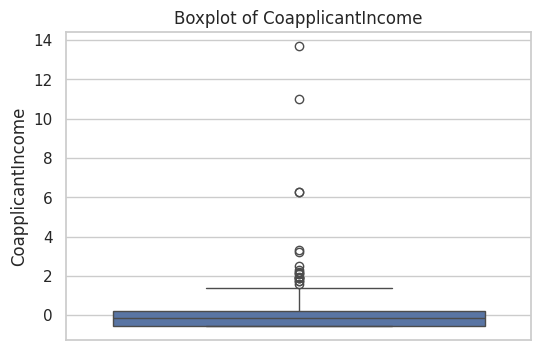

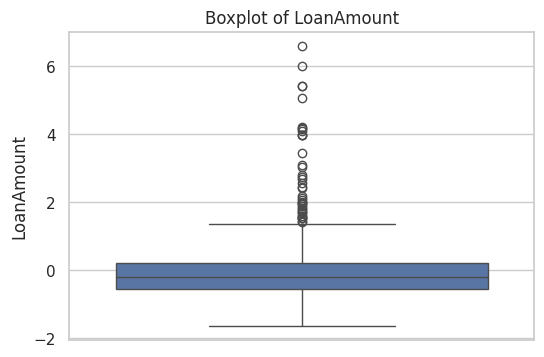

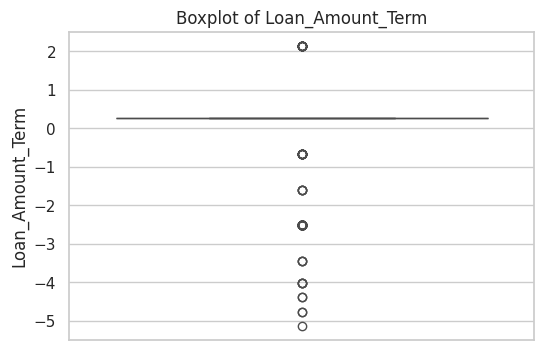

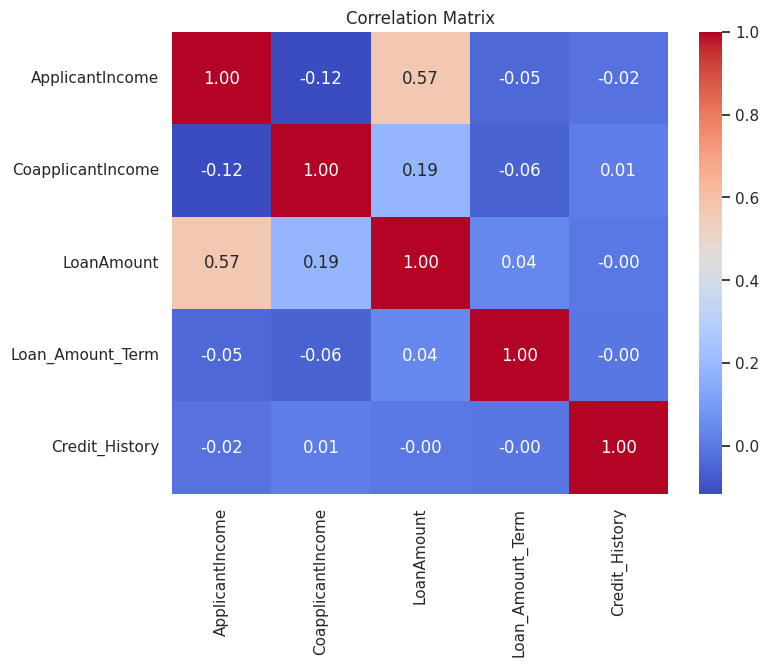

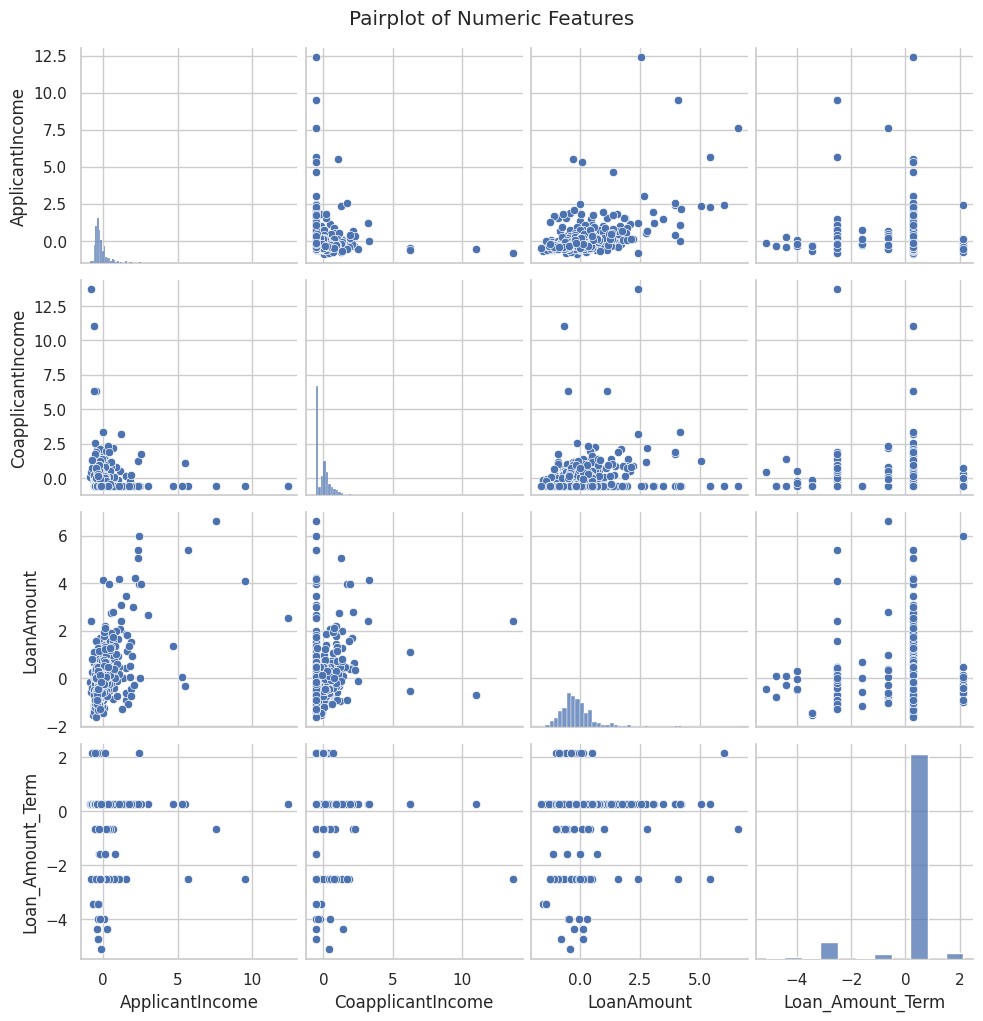

=== Loan Approval Insights ===
Overall approval rate: 68.7%

=== Credit History Insights ===
Approval with good credit: 79.0%
Approval with bad credit: 7.9%

=== Income Insights ===
Median income (approved): $-0
Median income (rejected): $-0
Note: 0 extreme high-income applicants detected

=== Property Area Insights ===
Semiurban: 76.8% approval
Urban: 65.8% approval

=== Loan Amount Insights ===
Median loan amount: -0.21
Detected 41 potential outliers:
Range: $-1.70 to $1.37

=== Loan Term Insights ===
Most common term: 0.2732312961117544 days (526 applications)


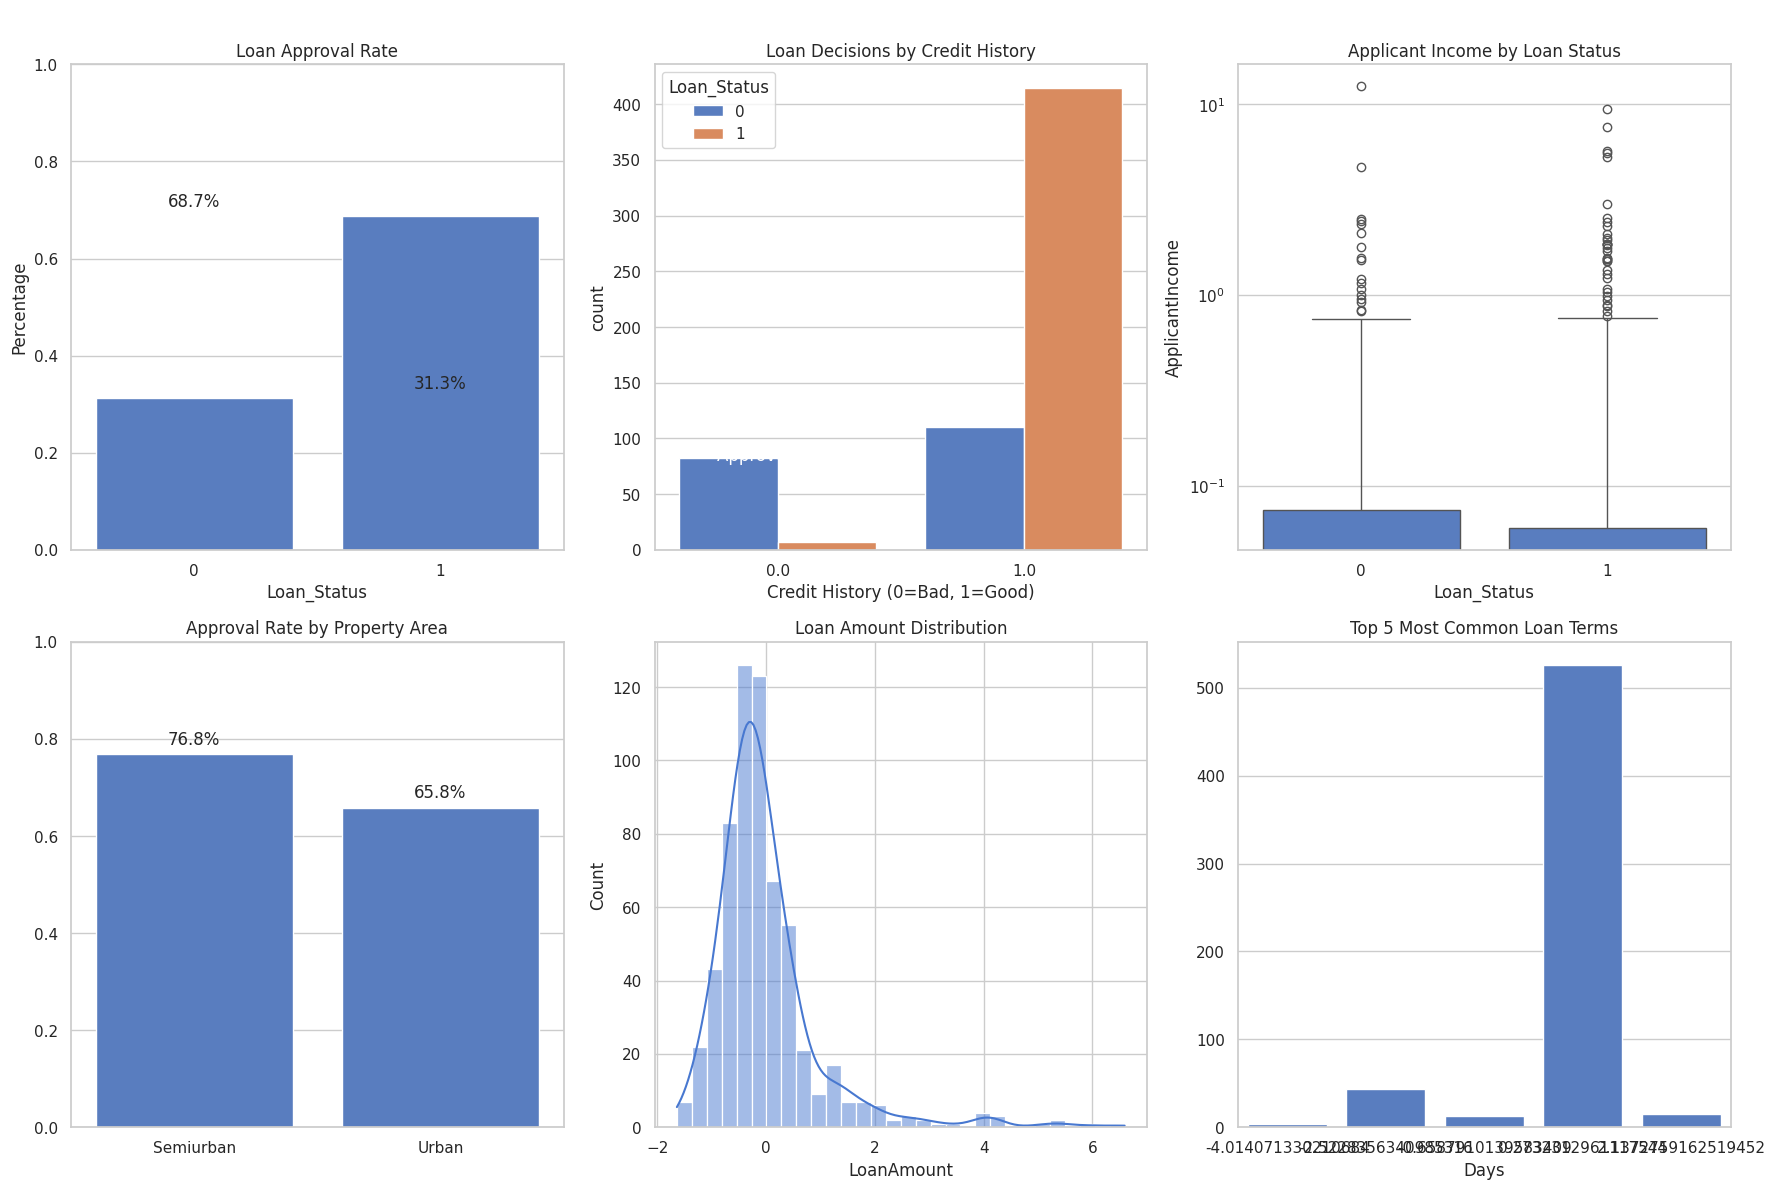


=== Anomaly Detection ===

1. High-income rejections (49 cases):
Possible reasons: Bad credit history or incomplete documentation

2. Low-income approvals (106 cases):
Possible reasons: Strong co-applicant or collateral

3. Unusual loan amounts (beyond $-1.70-$1.37):
    ApplicantIncome  LoanAmount  Loan_Status
5          0.002218    1.436099            1
9          1.218457    2.412650            0
21         0.090356    2.007739            1
34         1.162593    2.067285            0
54         0.998767    1.662373            0


In [2]:
#1
# Summary statistics
summary = df.describe()
median_values = df.median(numeric_only=True)

print("Summary statistics:\n", summary)
print("\nMedian values:\n", median_values)

#2
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")
numeric_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Histograms
df[numeric_features].hist(figsize=(10, 8), bins=20)
plt.suptitle("Histograms of Numeric Features")
plt.tight_layout()
plt.show()

# Boxplots
for col in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=col, data=df)
    plt.title(f'Boxplot of {col}')
    plt.show()


#3
# Correlation matrix
corr_matrix = df[numeric_features + ['Credit_History']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Optional: pairplot (can be slow on large datasets)
sns.pairplot(df[numeric_features])
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()

#4 & #5
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid", palette="muted")
plt.figure(figsize=(18, 12))

# 1. Target Variable Analysis (Loan Status)
plt.subplot(2, 3, 1)
loan_status_counts = df['Loan_Status'].value_counts(normalize=True)
sns.barplot(x=loan_status_counts.index, y=loan_status_counts.values)
plt.title('Loan Approval Rate')
plt.ylabel('Percentage')
plt.ylim(0, 1)
for i, v in enumerate(loan_status_counts):
    plt.text(i, v + 0.02, f"{v*100:.1f}%", ha='center')

# Inference
print("=== Loan Approval Insights ===")
print(f"Overall approval rate: {loan_status_counts[1]*100:.1f}%")

# 2. Credit History Impact (Most Significant Pattern)
plt.subplot(2, 3, 2)
credit_plot = sns.countplot(x='Credit_History', hue='Loan_Status', data=df)
plt.title('Loan Decisions by Credit History')
plt.xlabel('Credit History (0=Bad, 1=Good)')

# Calculate and annotate approval rates
credit_approval = df.groupby('Credit_History')['Loan_Status'].mean()
for i, history in enumerate([0, 1]):
    height = df[df['Credit_History'] == history].shape[0]
    plt.text(i, height*0.9, f"Approve: {credit_approval[history]*100:.1f}%",
             ha='center', color='white')

# Inference
print("\n=== Credit History Insights ===")
print(f"Approval with good credit: {credit_approval[1]*100:.1f}%")
print(f"Approval with bad credit: {credit_approval[0]*100:.1f}%")

# 3. Income Patterns (Applicant + Co-applicant)
plt.subplot(2, 3, 3)
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df)
plt.title('Applicant Income by Loan Status')
plt.yscale('log')  # Handle income outliers

# Calculate income thresholds
approved_income = df[df['Loan_Status'] == 1]['ApplicantIncome']
rejected_income = df[df['Loan_Status'] == 0]['ApplicantIncome']

# Inference
print("\n=== Income Insights ===")
print(f"Median income (approved): ${approved_income.median():,.0f}")
print(f"Median income (rejected): ${rejected_income.median():,.0f}")
print(f"Note: {sum(df['ApplicantIncome'] > 30000)} extreme high-income applicants detected")

# 4. Property Area Trends (Dynamic Handling)
property_cols = [col for col in df.columns if col.startswith('Property_Area_')]
if property_cols:
    plt.subplot(2, 3, 4)
    area_results = []
    for col in property_cols:
        area_name = col.replace('Property_Area_', '')
        approval_rate = df[df[col] == 1]['Loan_Status'].mean()
        area_results.append((area_name, approval_rate))

    areas, rates = zip(*sorted(area_results, key=lambda x: x[1], reverse=True))
    area_plot = sns.barplot(x=list(areas), y=list(rates))
    plt.title('Approval Rate by Property Area')
    plt.ylim(0, 1)
    for i, rate in enumerate(rates):
        area_plot.text(i, rate + 0.02, f"{rate*100:.1f}%", ha='center')

    # Inference
    print("\n=== Property Area Insights ===")
    for area, rate in zip(areas, rates):
        print(f"{area}: {rate*100:.1f}% approval")
else:
    print("\nNo Property Area columns found for analysis")

# 5. Loan Amount Analysis (Potential Anomalies)
plt.subplot(2, 3, 5)
sns.histplot(df['LoanAmount'], bins=30, kde=True)
plt.title('Loan Amount Distribution')

# Detect potential anomalies
q1 = df['LoanAmount'].quantile(0.25)
q3 = df['LoanAmount'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
outliers = df[(df['LoanAmount'] < lower_bound) | (df['LoanAmount'] > upper_bound)]

# Inference
print("\n=== Loan Amount Insights ===")
print(f"Median loan amount: {df['LoanAmount'].median():.2f}")
print(f"Detected {len(outliers)} potential outliers:")
print(f"Range: ${lower_bound:.2f} to ${upper_bound:.2f}")

# 6. Loan Term Patterns
plt.subplot(2, 3, 6)
term_counts = df['Loan_Amount_Term'].value_counts().nlargest(5)
sns.barplot(x=term_counts.index, y=term_counts.values)
plt.title('Top 5 Most Common Loan Terms')
plt.xlabel('Days')

# Inference
print("\n=== Loan Term Insights ===")
print(f"Most common term: {term_counts.idxmax()} days ({term_counts.max()} applications)")

plt.tight_layout()
plt.show()

# Additional Anomaly Detection
print("\n=== Anomaly Detection ===")

# 1. High Income but Rejected
high_income_rejected = df[(df['ApplicantIncome'] > df['ApplicantIncome'].quantile(0.75))
                         & (df['Loan_Status'] == 0)]
print(f"\n1. High-income rejections ({len(high_income_rejected)} cases):")
print("Possible reasons: Bad credit history or incomplete documentation")

# 2. Low Income but Approved
low_income_approved = df[(df['ApplicantIncome'] < df['ApplicantIncome'].quantile(0.25))
                       & (df['Loan_Status'] == 1)]
print(f"\n2. Low-income approvals ({len(low_income_approved)} cases):")
print("Possible reasons: Strong co-applicant or collateral")

# 3. Unusual Loan Amounts
print(f"\n3. Unusual loan amounts (beyond ${lower_bound:.2f}-${upper_bound:.2f}):")
print(outliers[['ApplicantIncome', 'LoanAmount', 'Loan_Status']].head())


TASK 3

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns

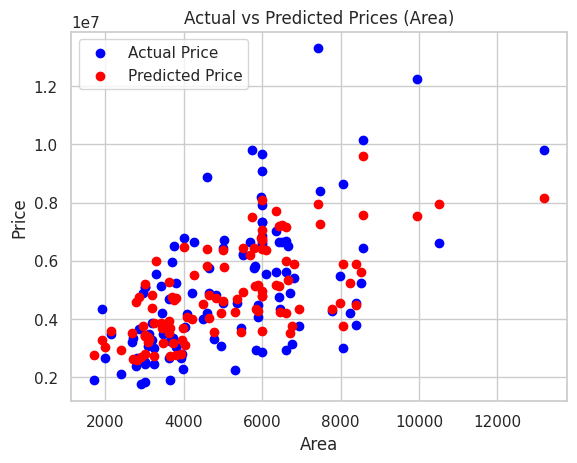


Model Coefficients:
                            Feature   Coefficient
0                              area  2.359688e+02
1                          bedrooms  7.677870e+04
2                         bathrooms  1.094445e+06
3                           stories  4.074766e+05
4                           parking  2.248419e+05
5                      mainroad_yes  3.679199e+05
6                     guestroom_yes  2.316100e+05
7                      basement_yes  3.902512e+05
8               hotwaterheating_yes  6.846499e+05
9               airconditioning_yes  7.914267e+05
10                     prefarea_yes  6.298906e+05
11  furnishingstatus_semi-furnished -1.268818e+05
12     furnishingstatus_unfurnished -4.136451e+05


In [4]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 2. Load the dataset
df = pd.read_csv("/content/Housing.csv")  # Change path if needed
print(df.head())
print("\nDataset Info:")
print(df.info())

# 3. Preprocessing
# Check missing values
print("\nMissing values:\n", df.isnull().sum())

# Assume 'price' is target, and other numerical features are predictors.
# If categorical variables exist, encode them.
df_encoded = pd.get_dummies(df, drop_first=True)

# 4. Split into train and test sets
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Fit a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 6. Make predictions
y_pred = model.predict(X_test)

# 7. Evaluate model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"MAE (Mean Absolute Error): {mae}")
print(f"MSE (Mean Squared Error): {mse}")
print(f"R² Score: {r2}")

# 8. Plot Regression (for one feature, e.g., 'area' vs 'price')
# Scatter plot for 'area' feature (if it exists)
if 'area' in X.columns:
    plt.scatter(X_test['area'], y_test, color='blue', label="Actual Price")
    plt.scatter(X_test['area'], y_pred, color='red', label="Predicted Price")
    plt.xlabel('Area')
    plt.ylabel('Price')
    plt.title('Actual vs Predicted Prices (Area)')
    plt.legend()
    plt.show()

# 9. Coefficients Interpretation
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

print("\nModel Coefficients:")
print(coefficients)
